In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

def load_diabetes_data():
  return pd.read_csv("/gdrive/My Drive/DataScience2/diabetes.csv")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
diabetes = load_diabetes_data()
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


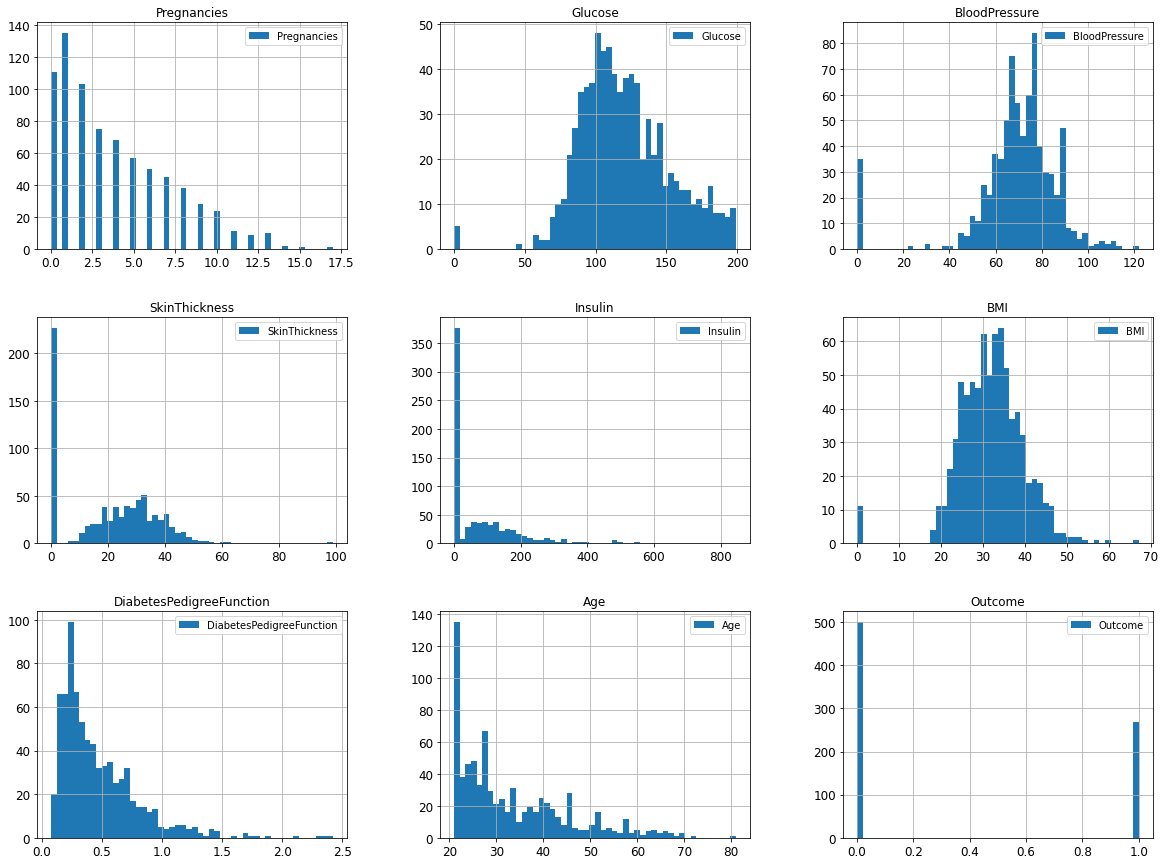

In [ ]:
diabetes.hist(bins=50, figsize=(20,15), legend=True)
plt.show()

In [ ]:
diabetes_copy = diabetes.copy(deep = True)
diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
print(diabetes_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
diabetes_copy['Glucose'].fillna(diabetes_copy['Glucose'].mean(), inplace = True)
diabetes_copy['BloodPressure'].fillna(diabetes_copy['BloodPressure'].mean(), inplace = True)
diabetes_copy['SkinThickness'].fillna(diabetes_copy['SkinThickness'].median(), inplace = True)
diabetes_copy['Insulin'].fillna(diabetes_copy['Insulin'].median(), inplace = True)
diabetes_copy['BMI'].fillna(diabetes_copy['BMI'].median(), inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c167e2b10>,
      dtype=object)

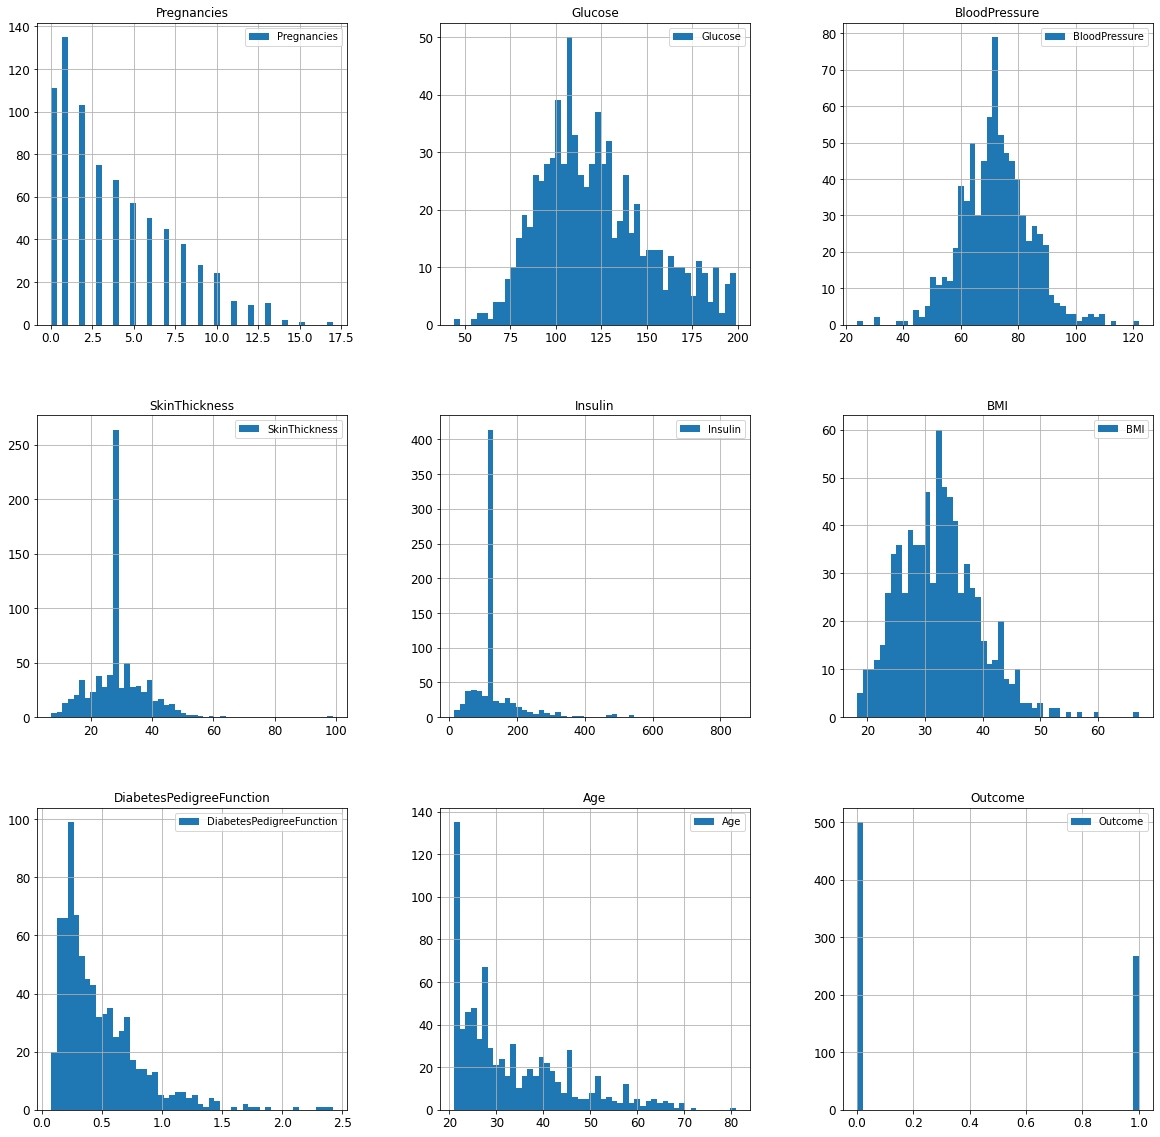

In [ ]:
diabetes_copy.hist(bins=50, figsize=(20,20), legend=True)

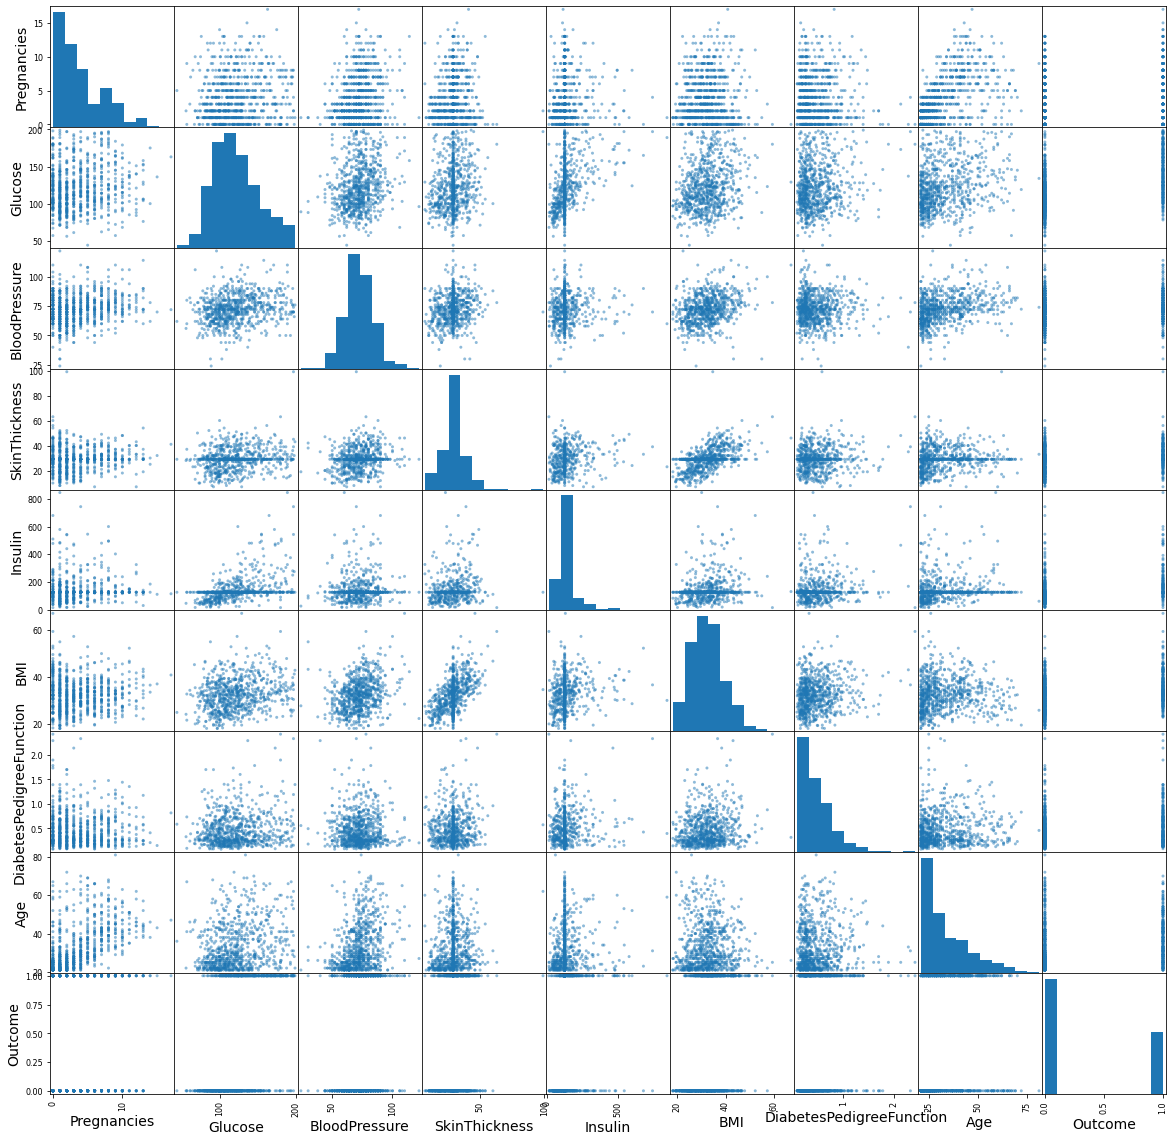

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(diabetes_copy,figsize=(20,20));

In [ ]:
np.random.seed(42)

In [ ]:
print(diabetes['Outcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


Text(0.5, 1.0, 'Distribution in target variable')

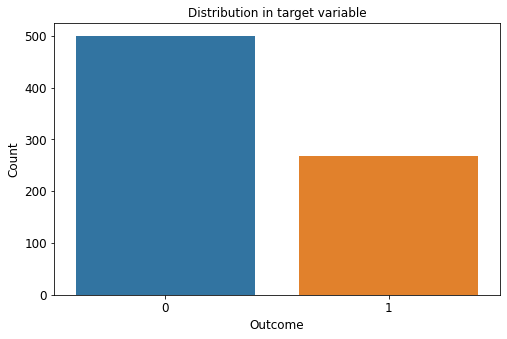

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(x = diabetes['Outcome'])
plt.xlabel('Outcome', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution in target variable', size = 12)

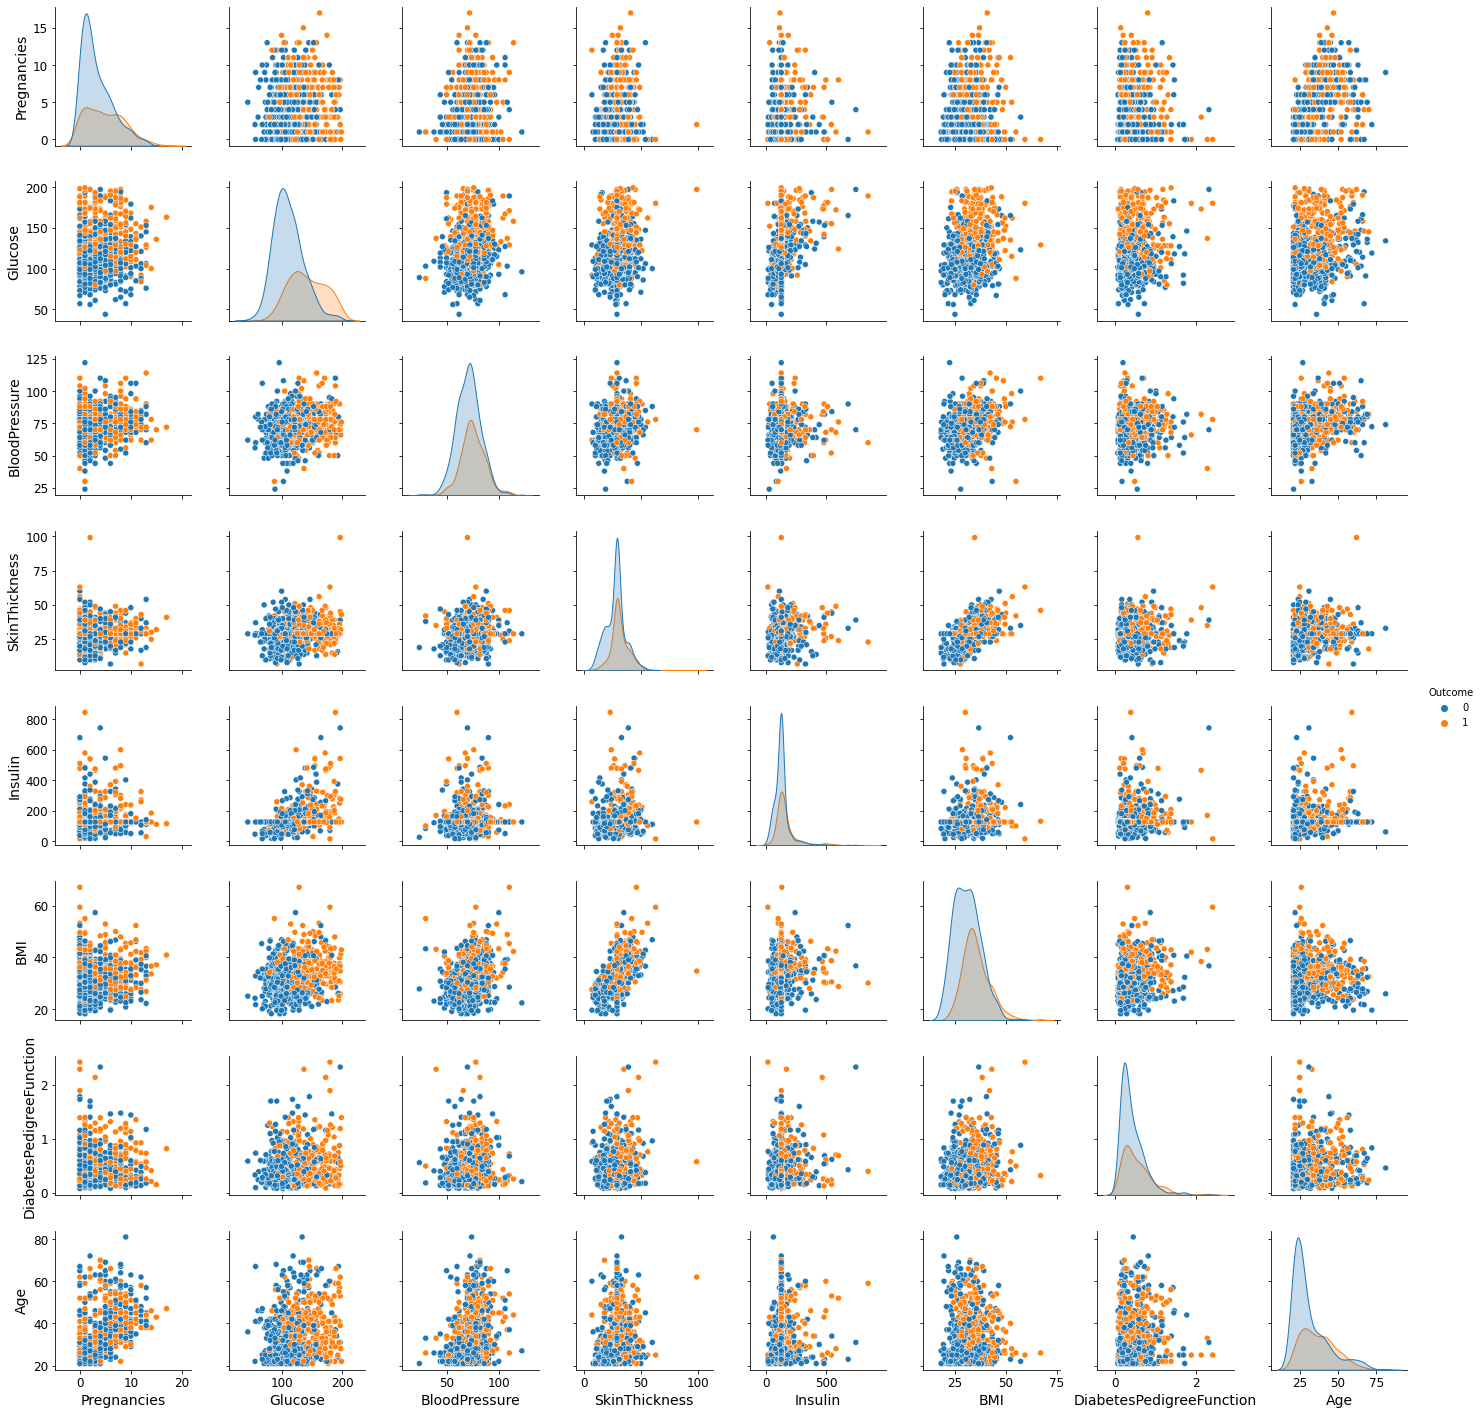

In [ ]:
diabetes_copy = sns.pairplot(diabetes_copy, hue = 'Outcome')

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

In [ ]:
diabetes_labels = diabetes['Outcome'].copy()
diabetes = diabetes.drop('Outcome', axis=1)

In [ ]:
col = diabetes.columns
std = StandardScaler()
diabetes = std.fit_transform(diabetes)
diabetes = pd.DataFrame(data = diabetes, columns=col)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [ ]:
over_sampler = RandomOverSampler()
x, y = over_sampler.fit_resample(diabetes, diabetes_labels)


In [ ]:
y.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(diabetes, test_size=0.1, random_state=42)   # ???

In [ ]:
test_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,0.639947,-0.716533,-0.574128,0.781814,0.956860,0.254780,-0.126471,0.830381
324,-0.547919,-0.278373,0.304734,0.719086,-0.692891,0.470543,-0.978145,-1.041549
624,-0.547919,-0.403562,-0.263941,-1.288212,-0.692891,-0.151361,-0.947944,-1.041549
690,1.233880,-0.434859,0.563223,-1.288212,-0.692891,-0.938260,1.160099,0.064591
473,0.936914,0.472758,1.080200,-1.288212,-0.692891,-0.265588,-0.790898,1.425995


In [ ]:
test_set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,0.639947,-0.716533,-0.574128,0.781814,0.956860,0.254780,-0.126471,0.830381
324,-0.547919,-0.278373,0.304734,0.719086,-0.692891,0.470543,-0.978145,-1.041549
624,-0.547919,-0.403562,-0.263941,-1.288212,-0.692891,-0.151361,-0.947944,-1.041549
690,1.233880,-0.434859,0.563223,-1.288212,-0.692891,-0.938260,1.160099,0.064591
473,0.936914,0.472758,1.080200,-1.288212,-0.692891,-0.265588,-0.790898,1.425995
...,...,...,...,...,...,...,...,...
512,1.530847,-0.935613,-0.057150,-1.288212,-0.692891,-0.989028,-0.821099,2.106697
109,-1.141852,-0.810425,0.821712,0.279989,-0.380306,0.686306,-0.679153,-0.786286
587,0.639947,-0.560048,-0.160546,-1.288212,-0.692891,-0.976336,-0.673113,-0.360847
362,0.342981,-0.560048,2.010760,1.032726,-0.692891,0.914761,-0.503986,2.702312


In [ ]:
train_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
396,-0.250952,-0.779128,-0.677523,0.844542,0.305642,-0.925569,1.425870,0.490030
528,-1.141852,-0.121888,-0.160546,0.656358,0.939494,-0.151361,0.063796,-0.956462
10,0.046014,-0.340968,1.183596,-1.288212,-0.692891,0.711690,-0.848280,-0.275760
192,0.936914,1.192592,-0.160546,-1.288212,-0.692891,-0.202129,-0.268417,0.234767
448,-1.141852,-0.528751,-0.263941,1.032726,-0.137185,0.204013,0.115138,-0.956462


In [ ]:
train_set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
396,-0.250952,-0.779128,-0.677523,0.844542,0.305642,-0.925569,1.425870,0.490030
528,-1.141852,-0.121888,-0.160546,0.656358,0.939494,-0.151361,0.063796,-0.956462
10,0.046014,-0.340968,1.183596,-1.288212,-0.692891,0.711690,-0.848280,-0.275760
192,0.936914,1.192592,-0.160546,-1.288212,-0.692891,-0.202129,-0.268417,0.234767
448,-1.141852,-0.528751,-0.263941,1.032726,-0.137185,0.204013,0.115138,-0.956462
...,...,...,...,...,...,...,...,...
71,0.342981,0.566649,-0.263941,0.907270,0.522715,-0.430583,-0.183854,-0.616111
106,-0.844885,-0.779128,2.734528,-1.288212,-0.692891,-1.217483,-0.799958,-0.531023
270,1.827813,-0.622642,0.873409,1.032726,-0.692891,1.727044,2.005732,0.404942
435,-1.141852,0.629244,-3.572597,-1.288212,-0.692891,1.320902,-0.805998,-0.360847


In [ ]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
995,-0.844885,0.034598,-0.263941,0.719086,0.661641,0.394392,0.664800,-0.275760
996,-1.141852,0.316272,-3.572597,-1.288212,-0.692891,1.422438,-0.609690,-0.616111
997,1.233880,-0.027996,-3.572597,-1.288212,-0.692891,-0.252897,-0.872441,0.404942
998,0.046014,-0.309671,0.149641,1.660007,1.104469,0.648230,2.772843,1.936522


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Outcome, Length: 1000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # ??

In [ ]:
from sklearn.naive_bayes import GaussianNB # model1 - Naiwny klasyfikator Bayesa
model = GaussianNB()

In [ ]:
model.fit(X_train, y_train )

GaussianNB()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
print("Dokładność: ", accuracy_score(X_test, predictions))    # ???
print("Precyzja: ", precision_score(X_test, predictions))
print("Czułość: ", recall_score(X_test, predictions))
print("Wskaźnik F1: ", f1_score(X_test, predictions) )

ValueError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # model 2 - Algorytm k-najbliższych sąsiadów
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x, y)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred=knn.predict(x)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y, y_pred))
print("Confusion Matrix:\n",confusion_matrix(y ,y_pred))
print("Training Score:\n",knn.score(x, y)*100)
print("Mean Squared Error:\n",mean_squared_error(y ,y_pred))
print("R2 score is:\n",r2_score(y, y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       500
           1       0.79      0.84      0.81       500

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000

Confusion Matrix:
 [[392 108]
 [ 82 418]]
Training Score:
 81.0
Mean Squared Error:
 0.19
R2 score is:
 0.24


In [ ]:
print(accuracy_score(y, y_pred)*100)

81.0
